In [43]:
import pandas as pd
import numpy as np
from IPython.display import Image
import random

In [44]:
personal = pd.read_excel('jeju_personal.xlsx')
place = pd.read_excel('jeju_place.xlsx')
travel = pd.read_excel('jeju_travel.xlsx')

In [45]:
# 액셀의 칼럼을 받아옴

personal = personal[[ "pid", "sex", "age", "marry"]]

place = place[["pid", "q3_1", "q3_2", "q3_3", "q3_4", "q3_5", 
                   "q3_6", "q3_7", "q3_8", "q3_9", "q3_10", "q3_11","q4",
                   "q4_1", "q4_2"]]

travel = travel[["pid","count","q1","q2","q2_1","q2_2_1","q2_2_2","q2_2_3","q2_2_4","q2_2_5"
                     ,"q2_2_6"]]


personal.columns = ["pid", "sex", "age", "marry"]



place.columns = ["pid", "act_nature", "act_food", "act_sports", "act_shop", "act_museum",
                   "act_movie", "act_bitch",  "act_report", "act_culture",
                   "act_history", "act_religion", "jplace","revisit", "recommend"]


travel.columns = ["pid","count","purpose","inform","num_people",
                    "relation1","relation2","relation3","relation4","relation5",
                    "relation6"]

travel = travel.drop_duplicates('pid',keep='first')
place = place.drop_duplicates('pid',keep='first')


data = pd.merge(personal, travel, on='pid')
data = pd.merge(data, place, on='pid')
#아래 데이터 항목에 맞춰 리스트 값 부여 예정
data = data[["pid","sex","age","marry","count","purpose","inform","num_people",
                    "relation1","relation2","relation3","relation4","relation5",
                    "relation6","act_nature", "act_food", "act_sports", "act_shop", "act_museum",
                   "act_movie", "act_bitch",  "act_report", "act_culture",
                   "act_history", "act_religion", "jplace","revisit", "recommend"]]

#list1을 생성하고 0번째 행에 15151515 저장
list1 = [15151515]
#설문지(사용자의 입력값을 받아서 list1에 저장)
print("1. 성별을 입력해주세요.(남자1/여자2 입력)")
s=int(input())
list1.append(s)
print("2. 나이를 입력해주세요.(15~20대 1입력/ 21~30대 2입력/ 31~40대 3입력/ 41~50대 4입력/ 51~60대 5입력/ 61 이상 6입력)")
s=int(input())
list1.append(s)
print("3. 혼인 여부를 입력해주세요. (미혼1/ 기혼2 입력)")
s=int(input())
list1.append(s)
print("4. 몇번째 제주도 방문인가요?(1,2,3,4)")
s=int(input())
list1.append(s)
print("5. 여행의 주 목적이 무엇입니까? (해당되는 번호 하나를 입력해주세요.)")
print("77) 자연경관감상                  60) 식도락(맛집여행)                 57) 산/오름/올레길 트래픽")
print("80) 쇼핑                       156) 박물관/테마공원 방문             174) 영화/드라마촬영지 방문")
print("37) 해변활동                     70) 레포츠(승마, 골프, ATV 등)        17) 전통문화체험")
print("104) 역사/문화유적지 방문           90) 종교/순례활동")
s=int(input())
list1.append(s)
print("6. 혼자여행 하실건가요?(아니면1 맞으면2를 입력해주세요.)")
s=int(input())
if s==2 :
    list1.append(s)
    
    for i in range(7):
        list1.append(0)

else:
    list1.append(s)
    print("7. 본인을 제외한 함께 여행할 일행의 수는 몇 명입니까?")
    s=int(input())
    num = s
    list1.append(s)
        
    for i in range(7):
        list1.append(0)
    
    print("8. 일행과의 관계를 골라주세요.(1-6까지 해당되는 번호 하나를 입력해주세요.단, 동행인 모두의 관계를 입력하시오.)")
    print("ex) 동행인 세 명이 모두 친구일 경우에는 1 을 한3번만 입력하시고 0을 입력해주세요 ")
    print("1) 친구/연인                          2) (직장)동료")
    print("3) 단체모임                           4) 비동거가족")
    print("5) 친척                               6) 기타")
    for i in range(num):
        s=int(input())
        if s==0:
            break
        if s==1:
            list1.pop(14)
            list1.insert(8,1)
        if s==2:
            list1.pop(14)
            list1.insert(9,2)
        if s==3:
            list1.pop(14)
            list1.insert(10,3)
        if s==4:
            list1.pop(14)
            list1.insert(11,4)
        if s==5:
            list1.pop(14)
            list1.insert(12,5)
        if s==6:
            list1.pop(14)
            list1.insert(13,6)
          
    list1.pop(14)
for i in range(1,15):
    list1.append(0)
#사용자에게 입력받은 데이터로만 여행지를 추천해줘야 하므로 만족도 값은 랜덤하게 받음


data.loc[3] = list1
#데이터가 들어왔는지 확인하고 분석하기 위하여 list1 값을 3행에 받아옴, 
print(list1)



data["num_people"] = data["num_people"].fillna(0)
data["relation1"] = data["relation1"].fillna(0)
data["relation2"] = data["relation2"].fillna(0)
data["relation3"] = data["relation3"].fillna(0)
data["relation4"] = data["relation4"].fillna(0)
data["relation5"] = data["relation5"].fillna(0)
data["relation6"] = data["relation6"].fillna(0)
data.isnull().sum()
data['relation'] = data[['relation1', 'relation2', 'relation3',
                            'relation4', 'relation5', 'relation6']].sum(axis=1)
data.drop(labels = ['relation1', 'relation2', 'relation3',
                    'relation4', 'relation5', 'relation6'], 
            axis = 1, inplace = True)
data['purpose'] = data['purpose'].astype(int)
data = data.fillna(0)


data["act_nature"] = data["act_nature"].map(lambda i: i/1 if i > 0 else 0).astype(int)
data["act_food"] = data["act_food"].map(lambda i: i/2 if i > 0 else 0).astype(int)
data["act_sports"] = data["act_sports"].map(lambda i: i/3 if i > 0 else 0).astype(int)
data["act_shop"] = data["act_shop"].map(lambda i: i/4 if i > 0 else 0).astype(int)
data["act_museum"] = data["act_museum"].map(lambda i: i/5 if i > 0 else 0).astype(int)
data["act_movie"] = data["act_movie"].map(lambda i: i/6 if i > 0 else 0).astype(int)
data["act_bitch"] = data["act_bitch"].map(lambda i: i/7 if i > 0 else 0).astype(int)
data["act_report"] = data["act_report"].map(lambda i: i/8 if i > 0 else 0).astype(int)
data["act_culture"] = data["act_culture"].map(lambda i: i/9 if i > 0 else 0).astype(int)
data["act_history"] = data["act_history"].map(lambda i: i/10 if i > 0 else 0).astype(int)
data["act_religion"] = data["act_religion"].map(lambda i: i/11 if i > 0 else 0).astype(int)

#purpose_jplace값 구하기
data['purpose_jplace'] = data['purpose'].astype(int)*1000 + data['jplace'].astype(int)
data.drop(labels = ['purpose'], axis = 1, inplace = True)
data.drop(labels = ['jplace'], axis = 1, inplace = True)



#데이터 확인 
count = 4
for index, row in data.iterrows():
    print(row,end = "\n\n")
    if index == count -1:
        break
        
        


1. 성별을 입력해주세요.(남자1/여자2 입력)
2
2. 나이를 입력해주세요.(15~20대 1입력/ 21~30대 2입력/ 31~40대 3입력/ 41~50대 4입력/ 51~60대 5입력/ 61 이상 6입력)
2
3. 혼인 여부를 입력해주세요. (미혼1/ 기혼2 입력)
1
4. 몇번째 제주도 방문인가요?(1,2,3,4)
3
5. 여행의 주 목적이 무엇입니까? (해당되는 번호 하나를 입력해주세요.)
77) 자연경관감상                  60) 식도락(맛집여행)                 57) 산/오름/올레길 트래픽
80) 쇼핑                       156) 박물관/테마공원 방문             174) 영화/드라마촬영지 방문
37) 해변활동                     70) 레포츠(승마, 골프, ATV 등)        17) 전통문화체험
104) 역사/문화유적지 방문           90) 종교/순례활동
77
6. 혼자여행 하실건가요?(아니면1 맞으면2를 입력해주세요.)
1
7. 본인을 제외한 함께 여행할 일행의 수는 몇 명입니까?
2
8. 일행과의 관계를 골라주세요.(1-6까지 해당되는 번호 하나를 입력해주세요.단, 동행인 모두의 관계를 입력하시오.)
ex) 동행인 세 명이 모두 친구일 경우에는 1 을 한3번만 입력하시고 0을 입력해주세요 
1) 친구/연인                          2) (직장)동료
3) 단체모임                           4) 비동거가족
5) 친척                               6) 기타
1
1
[15151515, 2, 2, 1, 3, 77, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
pid               100101.0
sex                    2.0
age                    3.0
marry             

In [46]:
act_data_pid = data[["pid", "act_nature", "act_food", "act_sports", "act_shop", "act_museum",
                   "act_movie", "act_bitch",  "act_report", "act_culture",
                   "act_history", "act_religion","purpose_jplace"]]

act_data = data[[ "act_nature", "act_food", "act_sports", "act_shop", "act_museum",
                   "act_movie", "act_bitch",  "act_report", "act_culture",
                   "act_history", "act_religion", "purpose_jplace"]]

noact_data_pid = data[["pid", "sex", "age","marry",  "recommend", "num_people", 
                 "relation", "purpose_jplace"
                      ]]

noact_data = data[["sex", "age", "marry", "recommend", "num_people", 
                 "relation",  "purpose_jplace"
                      ]]

print(act_data_pid)

           pid  act_nature  act_food  act_sports  act_shop  act_museum  \
0       100101           2         1           0         0           0   
1       100102           3         0           0         0           0   
2       100103           5         1           0         0           0   
3     15151515           0         0           0         0           0   
4       100105           0         0           0         0           0   
...        ...         ...       ...         ...       ...         ...   
6129    106230           2         1           0         0           0   
6130    106231           3         0           1         0           0   
6131    106232           2         1           1         0           0   
6132    106233           1         1           0         0           0   
6133    106234           0         1           0         0           0   

      act_movie  act_bitch  act_report  act_culture  act_history  \
0             0          0           0     

In [47]:
import random
random.seed(1)
for i in range(6134):
    for j in range(0,11):
        if act_data.values[i][j] != 0:
            act_data.values[i][j] = random.randrange(1,6)

act_data_pid = pd.concat([data['pid'], act_data], axis=1)
print(act_data_pid)

#유사도 측정 TEST
# act_data_pid.loc[0] = [1714257,0,5,0,0,0,0,0,0,0,0,0,60004]
# act_data_pid.loc[1] = [1613413,4,0,0,0,0,0,0,0,0,0,0,77001]
# act_data_pid.loc[2] = [1712377,0,0,5,0,0,0,0,0,0,0,0,57003]

act_data_pid.head()

           pid  act_nature  act_food  act_sports  act_shop  act_museum  \
0       100101           2         5           0         0           0   
1       100102           1         0           0         0           0   
2       100103           3         1           0         0           0   
3     15151515           0         0           0         0           0   
4       100105           0         0           0         0           0   
...        ...         ...       ...         ...       ...         ...   
6129    106230           2         4           0         0           0   
6130    106231           4         0           5         0           0   
6131    106232           3         5           4         0           0   
6132    106233           1         3           0         0           0   
6133    106234           0         2           0         0           0   

      act_movie  act_bitch  act_report  act_culture  act_history  \
0             0          0           0     

,pid,act_nature,act_food,act_sports,act_shop,act_museum,act_movie,act_bitch,act_report,act_culture,act_history,act_religion,purpose_jplace
0,100101,2,5,0,0,0,0,0,0,0,0,0,60004
1,100102,1,0,0,0,0,0,0,0,0,0,0,174004
2,100103,3,1,0,0,0,0,0,0,0,0,0,77001
3,15151515,0,0,0,0,0,0,0,0,0,0,0,77000
4,100105,0,0,0,0,0,0,0,0,0,0,0,37005


In [48]:
# 평균제곱차이 유사도
# act 데이터

from collections import OrderedDict

def sim_msd(data, name1, name2):
    s = 0
    count = 0
    for i in data[data.pid == name1]:
        if i == "pid":
            continue
        s += pow(int(data[data.pid == name1][i]) - int(data[data.pid == name2][i]), 2)
        count += 1
        
    return 1 / (1 + (s / count))

def top_match(data, name, index = 10, sim_function = sim_msd):
    li = []
    for i in data["pid"]:
        if (name != i):
            li.append((sim_function(data, name, i), i))
    li.sort()
    li.reverse()
    
    c = []
    for i in range(index):
        if int(data.loc[data.pid == li[i][1], "purpose_jplace"]) is not int(data.loc[data.pid == name, "purpose_jplace"]):
            c.append(int(data.loc[data.pid == li[i][1], "purpose_jplace"]))
            c = list(OrderedDict.fromkeys(c))
    
    return c

print("--유사도 결과--")
print(top_match(act_data_pid, 15151515))
print("결과 데이터 표를 참고하세요! \n")

#inputdata함수를 불러와 사용자의 만족도조사
# inpudata()

#data.loc[4] = list1



--유사도 결과--
[77001]
결과 데이터 표를 참고하세요! 



In [49]:
# 코사인 유사도
# act 데이터

from math import sqrt
from collections import OrderedDict

def sim_cosine(data, name1, name2):
    sum_name1 = 0
    sum_name2 = 0
    sum_name1_name2 = 0

    for i in data[data.pid == name1]:
        if i == "pid":
            continue
        sum_name1 += pow(int(data[data.pid == name1][i]), 2)
        sum_name2 += pow(int(data[data.pid == name2][i]), 2)
        sum_name1_name2 += int(data[data.pid == name1][i]) * int(data[data.pid == name2][i])
        
    return sum_name1_name2 / (sqrt(sum_name1)*sqrt(sum_name2))

def top_match(data, name, index = 10, sim_function = sim_cosine):
    li = []
    for i in data["pid"]:
        if (name != i):
            li.append((sim_function(data, name, i), i))
    li.sort()
    li.reverse()
    
    c = []
    for i in range(index):
        if int(data.loc[data.pid == li[i][1], "purpose_jplace"]) is not int(data.loc[data.pid == name, "purpose_jplace"]):
            c.append(int(data.loc[data.pid == li[i][1], "purpose_jplace"]))
            c = list(OrderedDict.fromkeys(c))
    
    return c
# top_match(act_data_pid, 1714257)
# top_match(act_data_pid, 1613413)
# top_match(act_data_pid, 1712377)
top_match(act_data_pid, 15151515)

[104008, 156021, 17006, 70008, 174004, 37005]

In [50]:
# 피어슨 유사도
# act 데이터

from collections import OrderedDict

def sim_pearson(data, name1, name2):
    avg_name1 = 0
    avg_name2 = 0
    count = 0
    for i in data[data.pid == name1]:
        if i == "pid":
            continue
        avg_name1 = int(data[data.pid == name1][i])
        avg_name2 = int(data[data.pid == name2][i])
        count += 1
        
    avg_name1 = avg_name1 / count
    avg_name2 = avg_name2 / count
    
    sum_name1 = 0
    sum_name2 = 0
    sum_name1_name2 = 0
    count = 0
    for i in data[data.pid == name1]:
        if i == "pid":
            continue
        sum_name1 += pow(int(data[data.pid == name1][i]) - avg_name1, 2)
        sum_name2 += pow(int(data[data.pid == name2][i]) - avg_name2, 2)
        sum_name1_name2 += (int(data[data.pid == name1][i]) - avg_name1) * (int(data[data.pid == name2][i]) - avg_name2)
        
    return sum_name1_name2 / (sqrt(sum_name1)*sqrt(sum_name2))

def top_match(data, name, index = 10, sim_function = sim_pearson):
    li = []
    for i in data["pid"]:
        if (name != i):
            li.append((sim_function(data, name, i), i))
    li.sort()
    li.reverse()
    
    c = []
    for i in range(index):
        if int(data.loc[data.pid == li[i][1], "purpose_jplace"]) is not int(data.loc[data.pid == name, "purpose_jplace"]):
            c.append(int(data.loc[data.pid == li[i][1], "purpose_jplace"]))
            c = list(OrderedDict.fromkeys(c))
    
    return c

# top_match(act_data_pid, 1712377)
# print(top_match(act_data_pid, 1714257))
# print(top_match(act_data_pid, 1613413))
# print(top_match(act_data_pid, 1712377))
top_match(act_data_pid, 15151515)

[37005, 104008, 156021]

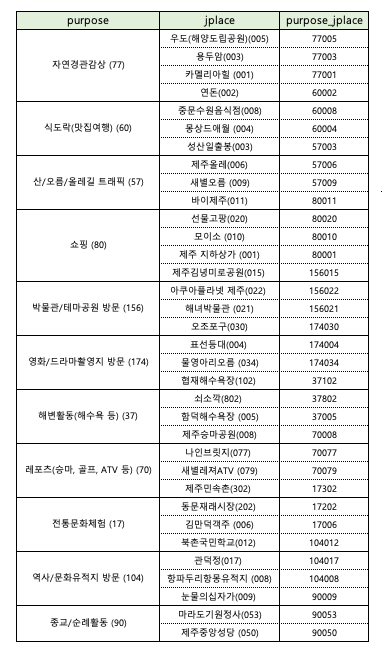

In [51]:
Image("/content/ouput_data.png")

In [52]:
#만족도 설문지 함수. 
#추후에 list1의 만족도 데이터 부분을 덮어씌울 예정
def inpudata():
    global data
    global list1
    print("1. 자연경관감상에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(14,s)
    list1.pop()
    print("2. 식도락(맛집여행)에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(15,s)
    list1.pop()
    print("3. 산/오름/올레길 트래픽에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(16,s)
    list1.pop()
    print("4. 쇼핑에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(17,s)
    list1.pop()
    print("5. 박물관/테마공원 방문에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(18,s)
    list1.pop()
    print("6. 영화/드라마촬영지 방문에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(19,s)
    list1.pop()
    print("7. 해변활동에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(20,s)
    list1.pop()
    print("8. 레포츠(승마, 골프, ATV 등)에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(21,s)
    list1.pop()
    print("9. 전통문화체험에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(22,s)
    list1.pop()
    print("10. 역사/문화유적지 방문에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(23,s)
    list1.pop()
    print("11. 종교/순례활동에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)")
    s=int(input())
    list1.insert(24,s)
    list1.pop()
    print("12. 여행추천 서비스에 대한 전반적 만족도에 대해 입력해주세요.(1아주불만족-10매우만족)")
    s=int(input())
    list1.insert(25,s)
    list1.pop()
    print("13. 재방문 의향이 있으신가요?(1매우아님-5아주많음)")
    s=int(input())
    list1.insert(26,s)
    list1.pop()
    print("14. 다른사람에게 추천할 의향이 있으신가요?(1매우아님-5아주많음)")
    s=int(input())
    list1.insert(27,s)
    list1.pop()

    #list1의 pid값을 랜덤하게 재생성(학습하고 추천할때 pid가 겹치는 것을 방지)
    list1.insert(0,random.randint(110000,550000))
    list1.pop(1)

    print(list1)
    data = data.append(list1,ignore_index=True)
#     new_data = data.append(data.iloc[-1],ignore_index=True)
#     new_data.at[-1] = list1
#     print(data.iloc[-1])

#     new_data = data.append(pd.Series(list1, index=data.columns), ignore_index=True)


#     data= pd.concat([data['pid'], list1], axis=1)
#     data = data.concat([data,list1])
#    # data.loc[6137] = list1



inpudata()


1. 자연경관감상에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
2. 식도락(맛집여행)에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
3. 산/오름/올레길 트래픽에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
4. 쇼핑에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
5. 박물관/테마공원 방문에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
6. 영화/드라마촬영지 방문에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
7. 해변활동에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
8. 레포츠(승마, 골프, ATV 등)에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
9. 전통문화체험에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
10. 역사/문화유적지 방문에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
11. 종교/순례활동에 대한 만족도를 입력해주세요.(1아주불만족-5매우만족)
5
12. 여행추천 서비스에 대한 전반적 만족도에 대해 입력해주세요.(1아주불만족-10매우만족)
5
13. 재방문 의향이 있으신가요?(1매우아님-5아주많음)
5
14. 다른사람에게 추천할 의향이 있으신가요?(1매우아님-5아주많음)
5
[408292, 2, 2, 1, 3, 77, 1, 2, 1, 1, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
